In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import optimize

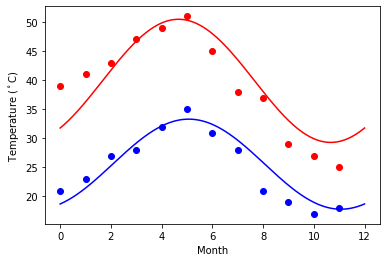

In [2]:
temp_max = np.array([39, 41, 43, 47, 49, 51, 45, 38, 37, 29, 27, 25])
temp_min = np.array([21, 23, 27, 28, 32, 35, 31, 28, 21, 19, 17, 18])
months = np.arange(12)

def yearly_temps(times, avg, ampl, time_offset):
    return (avg + ampl * np.cos((times + time_offset) * 2 * np.pi / times.max()))

res_max, cov_max = optimize.curve_fit(yearly_temps, months, temp_max, [20, 10, 0])
res_min, cov_min = optimize.curve_fit(yearly_temps, months, temp_min, [-40, 20, 0])

days = np.linspace(0, 12, num=365)

plt.figure()
plt.plot(months, temp_max, 'ro')
plt.plot(days, yearly_temps(days, *res_max), 'r-')
plt.plot(months, temp_min, 'bo')
plt.plot(days, yearly_temps(days, *res_min), 'b-')
plt.xlabel('Month')
plt.ylabel('Temperature ($^\circ$C)')

plt.show()
                                      

In [3]:
url='https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_original.csv'
titanic = pd.read_csv(url)

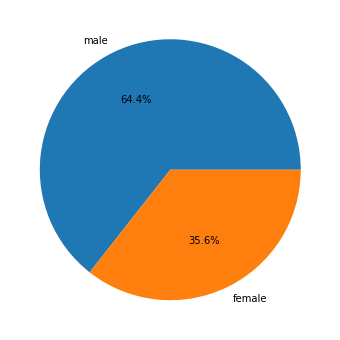

In [4]:
'Create a pie chart presenting the male/female proportion'
y = titanic.sex.value_counts()
plt.figure(figsize = (10,6))
plt.pie(y,  labels = y.index, autopct='%.1f%%')
plt.show()

Text(0, 0.5, 'Fare')

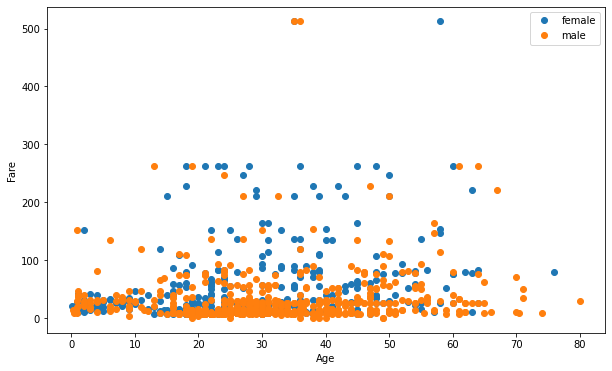

In [5]:
'Create a scatterplot with the Fare paid and the Age, differ the plot color by gender'
groups = titanic.groupby('sex')
plt.figure(figsize=(10,6))
for gender, group in groups:
    plt.plot(group['age'], group['fare'], marker = 'o', linestyle = '', label = gender)
plt.legend()
plt.xlabel('Age')
plt.ylabel('Fare')